# Week 3 Assignment

### Plotting data and fitting a curve

In [2]:
# loading Plots library
using Plots
pyplot()

Plots.PyPlotBackend()

1 - Import the supplied data representing 15 pairs to x- and y-values. 

In [3]:
# loading the data in
data_tofit = readdlm("Week3_PR_Data.dat", '\t')

# data_tofit = [1.6800483    -1.641695388; 
#               0.501309281  -0.977697538; 
#               1.528012113   0.52771122;
#               1.70012253    1.711524991; 
#               1.992493625   1.891000015;
#               2.706075824  -0.463427794;
#               2.994931927  -0.443566619;
#               3.491852811  -1.275179133;
#               3.501191722  -0.690499597;
#               4.459924502  -5.516130799;
#               4.936965851  -6.001703074;
#               5.023289852  -8.36416901;
#               5.04233698   -7.924477517;
#               5.50739285  -10.77482371;
#               5.568665171 -10.9171878];


2 - Write a ‘For’ loop to print out all the values of data_tofit

In [20]:
for i = 1:size(data_tofit, 1)
    println("0"^(i<10), i, "  :: ", data_tofit[i, :])
end

01  :: [0.1268, -1.6417]
02  :: [0.501309, -0.977698]
03  :: [1.52801, 0.527711]
04  :: [1.70012, 1.71152]
05  :: [1.99249, 1.891]
06  :: [2.70608, -0.463428]
07  :: [2.99493, -0.443567]
08  :: [3.49185, -1.27518]
09  :: [3.50119, -0.6905]
10  :: [4.45992, -5.51613]
11  :: [4.93697, -6.0017]
12  :: [5.02329, -8.36417]
13  :: [5.04234, -7.92448]
14  :: [5.50739, -10.7748]
15  :: [5.56867, -10.9172]


3 -  Assign the values from the first column of data_tofit into a new array called x. Similarly assign the values from the second column of data_tofit into a new array called y.

In [21]:
# Create the arrays x and y, assigning x the first column of data_tofit and y the second column
x, y = data_tofit[:,1], data_tofit[:,2];

4 - Then we do a scatterplot, this gives us the points the line must go through.


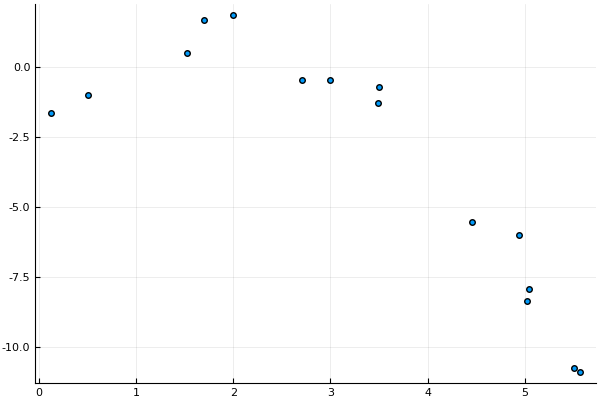

In [22]:
# Plot the x and y data points using a scatter plot of the x and y array variables
plot(x, y,
     line = (:scatter),
     legend = false)

For the line, we need a function, which we now define. Note that the parameters a, b, c need not be passed to the function: we will keep resetting them to try to improve the fit.

In [23]:
# Create a function called parabfit, with x as the argument, returning a*x^2 + b*x + c
parabfit(x) = a*x^2 + b*x + c

parabfit (generic function with 1 method)

Let's check that we do get a reasonable parabola. Choose your own interval [xmin, xmax] and parameters a, b, c. If it looks too much like a straight line, chance your choices until it does.


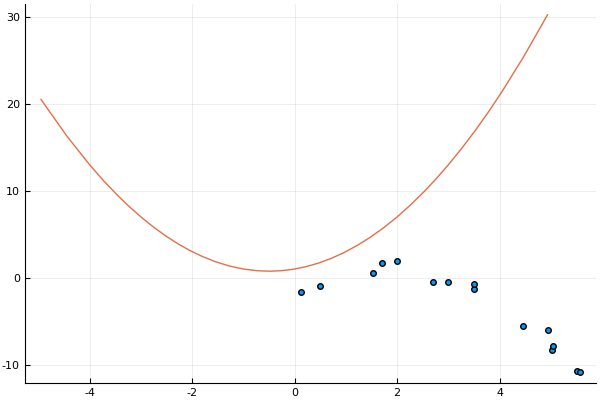

In [24]:
# Create variables a, b and c, assigning each the value 1
a = 1
b = 1
c = 1

# Plot the function parabfit, for x values between -5 and 5 
plot!(parabfit, -5, 5)

Now we choose a, b, c and plot the curve together with the points. 

Note that by looking at where the data points lie, we can deduce some of the properties for a, b, c, as follows.

The plot must have a y-intersection that is close to 0, so c is close to 0. Also, the parabola is open downwards, so a must be negative. Finally, it has its maximum at a positive x, so b must be positive. 

Use plot() to start with the scatter plot and plot!() to add the curve for parabfit. (There are other ways to do this ...)


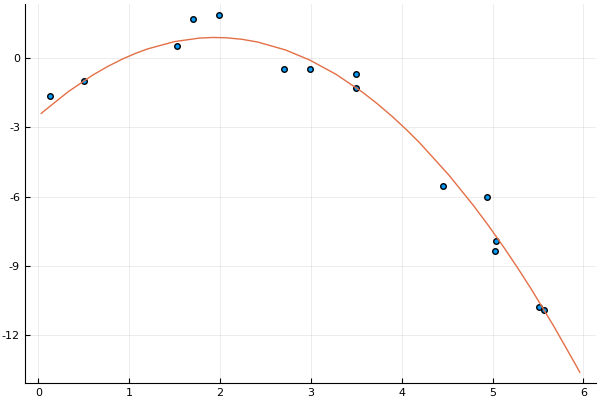

In [47]:
# Manually, the following values were reached:
a = -0.9
b = 3.5
c = -2.5

plot(x, y,
     line = (:scatter),
     legend = false)
plot!(parabfit, 0, 6)


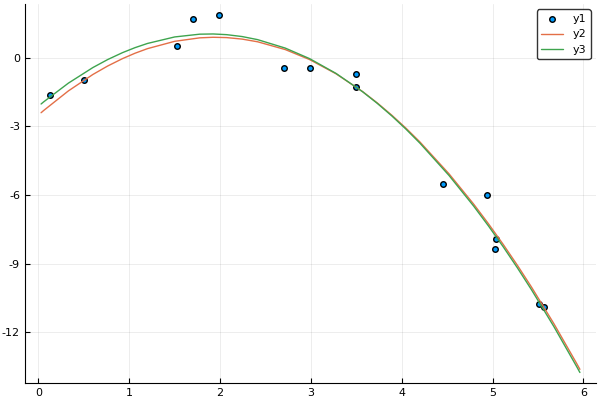

In [60]:
# Bonus: let's find the best values of a, b and c to fit our curve automatically
using Optim

m = length(y)
parab(a,b,c,x) = a * x ^ 2 + b * x + c

# let's write our cost function
function cost(θ)
    a,b,c = θ
    return sum((parab.(a, b, c, x) - y).^2)/2m
end

θ = Optim.minimizer(optimize(cost, [0.0, 0.0, 0.0]))

#original data
scatter(x,y)

# manually fitted curve
manual_θ = [-0.9, 3.5, -2.5]
manual_parab(x) = parab(manual_θ[1], manual_θ[2], manual_θ[3], x)
plot!(manual_parab, 0, 6)

#automatically fitted curve
auto_parab(x) = parab(θ[1], θ[2], θ[3], x)
plot!(auto_parab, 0, 6)